Goal of this notebook:

Build 'generative models' of collision events of impaired vs collision events of reported non-impaired.

Why? Find data to support or challenge the assumption that impairment related collisions have a higher frequency of occurence.

This can serve as a baseline model framework for engaging with a study of road features contributing to rate of collisions, by controlling for one of the more random (probabilistic) elements in increasing the likelihood of a collision-- the mental state of the driver. No analysis of road features and traffic collision can happen without understanding this in between layers.

A step after this will be looking at rates of injurious/fatal events vs non injurious/fatal events and see how impairment factors into this.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../data/all_sdot_merged_with_wsdot_080820.csv', low_memory=False)

In [3]:
[print(idx, col) for idx, col in enumerate(df.columns)];

0 longitude
1 latitude
2 OBJECTID
3 INCKEY
4 COLDETKEY
5 REPORTNO
6 STATUS
7 ADDRTYPE
8 INTKEY
9 LOCATION
10 EXCEPTRSNCODE
11 EXCEPTRSNDESC
12 SEVERITYCODE
13 SEVERITYDESC
14 COLLISIONTYPE
15 PERSONCOUNT
16 PEDCOUNT
17 PEDCYLCOUNT
18 VEHCOUNT
19 INJURIES
20 SERIOUSINJURIES
21 FATALITIES
22 INCDATE
23 INCDTTM
24 JUNCTIONTYPE
25 SDOT_COLCODE
26 SDOT_COLDESC
27 INATTENTIONIND
28 UNDERINFL
29 WEATHER_x
30 ROADCOND
31 LIGHTCOND
32 SDOTCOLNUM
33 ST_COLCODE
34 ST_COLDESC
35 SEGLANEKEY
36 CROSSWALKKEY
37 HITPARKEDCAR
38 JURISDICTION
39 COUNTY
40 CITY
41 INDEXED PRIMARY TRAFFICWAY
42 PRIMARY TRAFFICWAY
43 BLOCK NUMBER
44 MILEPOST
45 INTERSECTING TRAFFICWAY
46 DIST FROM REF POINT
47 MI or FT
48 COMP DIR FROM REF POINT
49 REFERENCE POINT NAME
50 DATE
51 YEAR
52 QTR #
53 MONTH
54 FULL TIME
55 MOST SEVERE SOBRIETY TYPE
56 MOST SEVERE INJURY TYPE
57 TOTAL CRASHES
58 FATAL CRASHES
59 SERIOUS INJURY CRASHES
60 EVIDENT INJURY CRASHES
61 POSSIBLE INJURY CRASHES
62 PDO - NO INJURY CRASHES
63 TOTAL FATALI

In [7]:
df[['DATE','TOTAL FATALITIES']]

,DATE,TOTAL FATALITIES
0,9/16/2007,0.0
1,11/24/2006,0.0
2,12/27/2006,0.0
3,8/19/2019,0.0
4,10/28/2019,0.0
...,...,...
220803,NaN,NaN
220804,NaN,NaN
220805,10/4/2019,0.0
220806,NaN,NaN


In [8]:
df['TOTAL FATALITIES'].value_counts()

0.0    162137
1.0       284
2.0        12
3.0         2
5.0         1
4.0         1
Name: TOTAL FATALITIES, dtype: int64

In [9]:
df['TOTAL SERIOUS INJURIES'].value_counts()

0.0     159535
1.0       2704
2.0        169
3.0         18
4.0          7
5.0          2
41.0         1
6.0          1
Name: TOTAL SERIOUS INJURIES, dtype: int64

In [11]:
df['SERIOUS INJURY CRASHES'].value_counts()

0.0    159571
1.0      2866
Name: SERIOUS INJURY CRASHES, dtype: int64

In [13]:
df['EVIDENT INJURY CRASHES'].value_counts()

0.0    147145
1.0     15292
Name: EVIDENT INJURY CRASHES, dtype: int64

In [14]:
df['POSSIBLE INJURY CRASHES'].value_counts()

0.0    125459
1.0     36978
Name: POSSIBLE INJURY CRASHES, dtype: int64

In [16]:
df['PDO - NO INJURY CRASHES'].value_counts()

1.0    107001
0.0     55436
Name: PDO - NO INJURY CRASHES, dtype: int64

In [24]:
pd.to_datetime(df['DATE']).isnull().sum()

58371

In [25]:
pd.to_datetime(df['YEAR']).isnull().sum()

0

In [31]:
df['YEAR'] = pd.to_datetime(df['YEAR'], yearfirst=True, format='%Y')

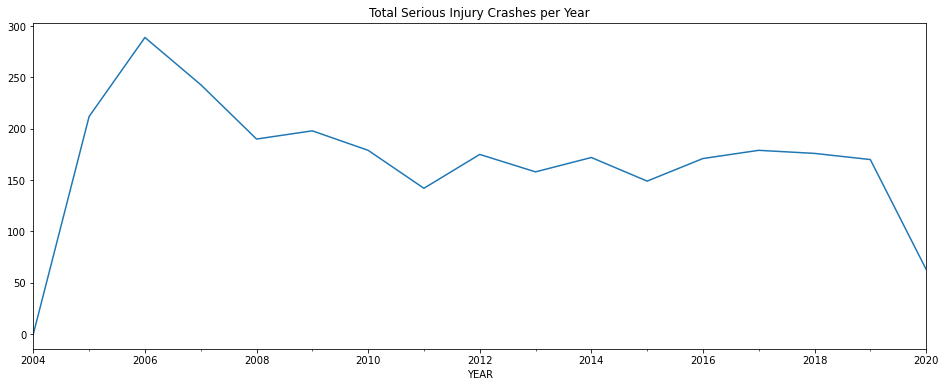

In [49]:
df.groupby(pd.Grouper(key='YEAR'))['SERIOUS INJURY CRASHES'].sum().sort_index().plot(figsize=(16,6), title='Total Serious Injury Crashes per Year')

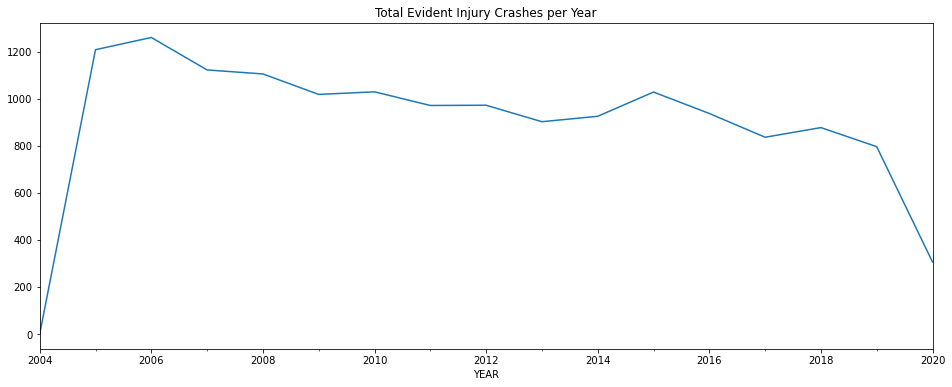

In [48]:
df.groupby(pd.Grouper(key='YEAR'))['EVIDENT INJURY CRASHES'].sum().sort_index().plot(figsize=(16,6), title='Total Evident Injury Crashes per Year')

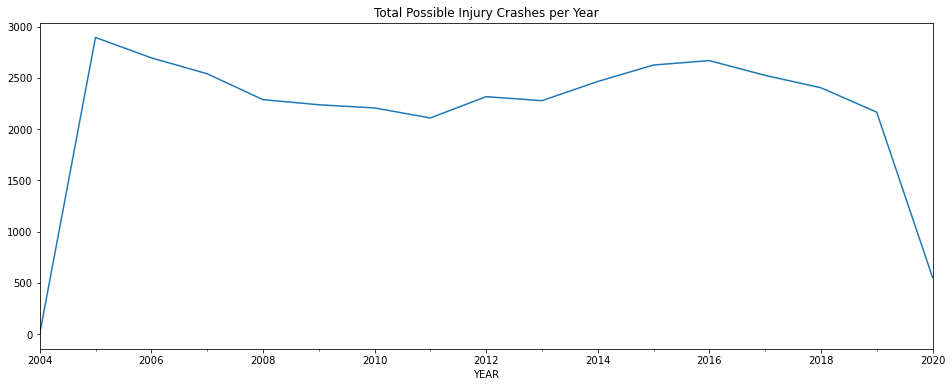

In [47]:
df.groupby(pd.Grouper(key='YEAR'))['POSSIBLE INJURY CRASHES'].sum().sort_index().plot(figsize=(16,6), title='Total Possible Injury Crashes per Year')

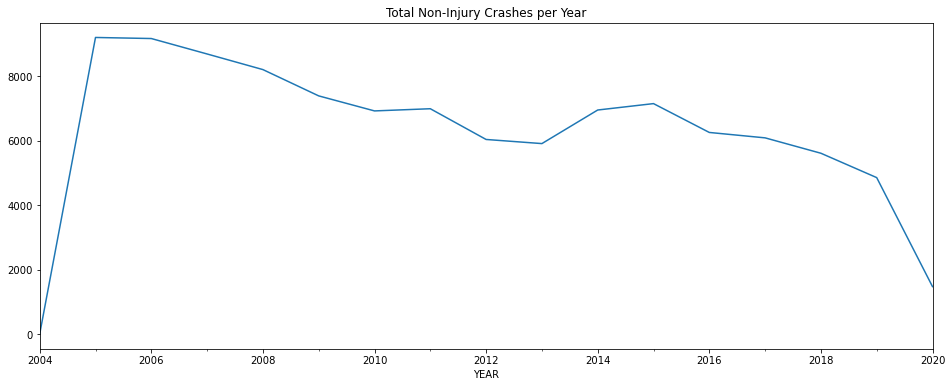

In [46]:
df.groupby(pd.Grouper(key='YEAR'))['PDO - NO INJURY CRASHES'].sum().sort_index().plot(figsize=(16,6), title='Total Non-Injury Crashes per Year')